# COGS 108 Final Project

Team Members: Thalal Cassim, Kevin Chen, Yongji Shen, Ansuman Somasundaram, Wei Zeng

## Grading Rubric For Ur Reference
https://github.com/COGS108/Projects/blob/master/FinalProj_Checklist.pdf

# Introduction and Background

# Data Description

# Data Cleaning & Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read from data set
suicide = pd.read_csv("./datasets/suicide-rates-overview-1985-to-2016.csv")

In [3]:
#select data from those following countries from our data set
selected = ["Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa"]
tmp = list()   
for i in (suicide.index):
    for country in selected:
        if suicide.loc[i,"country"]==country:
            tmp.append(suicide.loc[i].tolist())
df = pd.DataFrame(columns = suicide.columns)
for i in tmp:
    df = df.append(pd.Series(i, index=suicide.columns), ignore_index=True)

In [4]:
#suicide.isnull().any()
suicideHDI = suicide.dropna()

dfHDI = df.dropna()

In [5]:
#sex,age,dgc,and hdi for all countries
suicide_sex = suicide[['country','year','sex','suicides_no','population']]
suicide_age = suicide[['country','year','age','suicides_no','population']]
suicide_gdp = suicide[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
suicide_hdi = suicideHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [6]:
#sex,age,dgc,and hdi for selected countries 
#("Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa")
df_sex = df[['country','year','age','sex','suicides_no','population']]
df_age = df[['country','year','age','suicides_no','population']]
df_gdp = df[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
df_hdi = dfHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [7]:
year = df_sex['year'].unique()
#print(year)
count_male = 0
conut_female = 0
#df_sex
for i in range(len(df_sex)):
    if df_sex.loc[i,"country"] == 'Argentina':
        if df_sex.loc[i,"sex"] == "male":
            count_male += df_sex.loc[i,"suicides_no"]
        else:
            conut_female += df_sex.loc[i,"suicides_no"]
print(count_male)
print(conut_female)
df_sex

63893
18326


,country,year,age,sex,suicides_no,population
0,Argentina,1985,75+ years,male,202,363000
1,Argentina,1985,55-74 years,male,485,1997000
2,Argentina,1985,35-54 years,male,414,3346300
3,Argentina,1985,55-74 years,female,210,2304000
4,Argentina,1985,25-34 years,male,177,2234200
5,Argentina,1985,75+ years,female,41,537000
6,Argentina,1985,15-24 years,male,156,2415200
7,Argentina,1985,35-54 years,female,142,3355300
8,Argentina,1985,25-34 years,female,65,2185200
9,Argentina,1985,15-24 years,female,69,2354200


# Data Visualization

## Seaborn Config

In [8]:
# Configure Seaborn
sns.set()
sns.set_context('talk')

# Set max number of displayed rows/columns
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

## Sex + Age vs Suicide Rates

(0, 700)

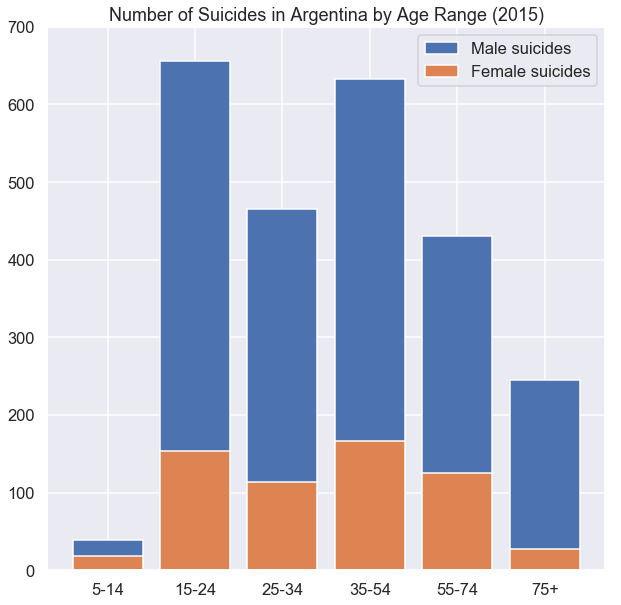

In [18]:
# Sex+Age vs Suicide Rates
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)

df_sex_2015 = df_sex[df_sex['year'] == 2015]
df_sex_argentina = df_sex_2015[df_sex_2015['country'] == 'Argentina']

count_male_a = 0
count_male_b = 0
count_male_c = 0
count_male_d = 0
count_male_e = 0
count_male_f = 0

#df_sex
df_male_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'male']

for index, row in df_male_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_male_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_male_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_male_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_male_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_male_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_male_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_male_a, "count 15-24:", count_male_b, "count 25-34:", count_male_c, "count 35-54:", count_male_d, "count 55_74:", count_male_e, "count 75+:", count_male_f)

m_count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_male_a, count_male_b, count_male_c, count_male_d, count_male_e, count_male_f]} 
m_counts = pd.DataFrame(m_count_dict)

count_female_a = 0
count_female_b = 0
count_female_c = 0
count_female_d = 0
count_female_e = 0
count_female_f = 0

#df_sex
df_female_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'female']

for index, row in df_female_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_female_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_female_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_female_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_female_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_female_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_female_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_female_a, "count 15-24:", count_female_b, "count 25-34:", count_female_c, "count 35-54:", count_female_d, "count 55_74:", count_female_e, "count 75+:", count_female_f)

fem_count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_female_a, count_female_b, count_female_c, count_female_d, count_female_e, count_female_f]} 
fem_counts = pd.DataFrame(fem_count_dict)
plt.figure(figsize = (10, 10))
plt.bar(m_counts.Group, height = m_counts.Count, label = 'Male suicides')
plt.bar(fem_counts.Group, height = fem_counts.Count, label = 'Female suicides')
plt.legend(loc = 'upper right')
plt.title("Number of Suicides in Argentina by Age Range (2015)")
plt.ylim(0, 700)


## GDP vs Suicide Rate

                     ratio    gdp
country                          
Antigua and Barbuda     15   9.14
Argentina              112  11.77
Armenia                 45  10.02
...                    ...    ...
United Kingdom          86  12.46
United States          175  13.26
Uruguay                270  10.73

[62 rows x 2 columns]


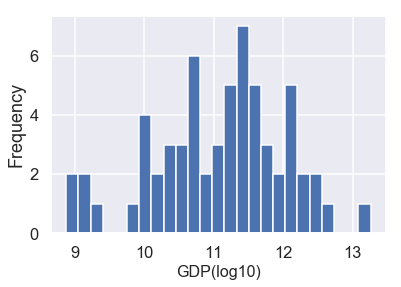

In [19]:
# GDP vs Suicide Rate
# ARG_gdp = df_gdp[df_gdp['country'] == 'Argentina']
# year = df_gdp['year'].unique()
# print(year)
# GDP vs Suicide Rate for 2016
#df_gdp = df[['country','year','suicides_no','population',' gdp_for_year ($) ','gdp_per_capita ($)']]
#year = df_sex['year'].unique()
#year = 2016
#country = df_gdp['country'].unique()
suicide_gdp = suicide_gdp[suicide_gdp.year == 2015]
#df_gdp
#print(suicide_gdp['country'].unique())
#suicide_gdp[suicide_gdp['country']=='Antigua and Barbuda']
tmp1 = suicide_gdp['country'].unique()
result1 = dict()
for i in tmp1:
    result1[i] = 0
result2 = dict()
for i in tmp1:
    result2[i] = 0
for i in suicide_gdp.index:
    country = suicide_gdp.loc[i,"country"]
    ratio = suicide_gdp.loc[i,'suicides/100k pop']
    gdp = suicide_gdp.loc[i,' gdp_for_year ($) ']
    result1[country]+= ratio
    result2[country] = gdp
country=list()
ratiolist = list()
gdplist = list()
import math
for i in tmp1:
    ratio = result1[i]
    gdp = result2[i]
    country.append(i)
    ratiolist.append(int(ratio))
    gdp = gdp.replace(',','')
    gdplist.append(math.log10(int(gdp)))
data= dict()
data = {"country":country,"ratio":ratiolist,"gdp":gdplist}

df1 = pd.DataFrame(data)

#print(ratiolist)
#print(gdplist)
df1=df1.set_index("country")
print(df1)
df1['gdp'].plot('hist', bins = 25)
plt.xlabel('GDP(log10)', fontsize=16)
f2 = plt.gcf()

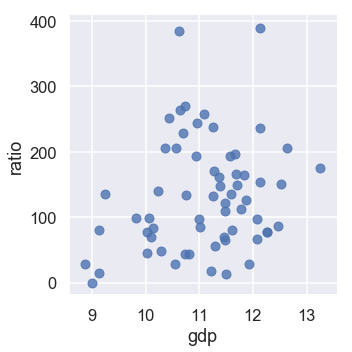

In [20]:
%matplotlib inline
sns.lmplot(x='gdp', y='ratio', data=df1,fit_reg=False);

                   country  year  suicides_no  suicides/100k pop  population  \
564    Antigua and Barbuda  2014            0               0.00        8537   
565    Antigua and Barbuda  2014            0               0.00        7578   
566    Antigua and Barbuda  2014            0               0.00       15273   
...                    ...   ...          ...                ...         ...   
27817           Uzbekistan  2014           60               2.17     2762158   
27818           Uzbekistan  2014           44               1.67     2631600   
27819           Uzbekistan  2014           21               1.46     1438935   

       HDI for year  
564            0.78  
565            0.78  
566            0.78  
...             ...  
27817          0.68  
27818          0.68  
27819          0.68  

[900 rows x 6 columns]


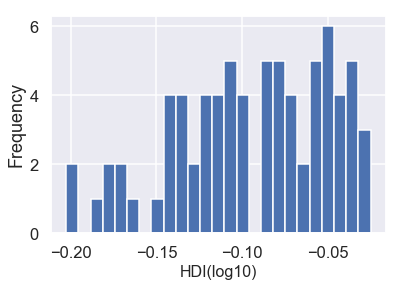

In [26]:
# HDI vs Suicide Rate for 2016
#HDI vs Suicide Rate for 2014
suicide_hdi = suicide_hdi[suicide_hdi.year == 2014]
print(suicide_hdi)
tmp1 = suicide_hdi['country'].unique()
result3 = dict()
for i in tmp1:
    result3[i] = 0

result4 = dict()
for i in tmp1:
    result4[i] = 0

for i in suicide_hdi.index:
    country = suicide_hdi.loc[i,"country"]
    ratio = suicide_hdi.loc[i,'suicides/100k pop']
    hdi = suicide_hdi.loc[i,'HDI for year']
    result3[country]+= ratio
    result4[country] = hdi
country=list()
ratiolist2 = list()
hdilist = list()

import math
for i in tmp1:
    ratio = result3[i]
    hdi = result4[i]
    country.append(i)
    ratiolist2.append(int(ratio))
    #hdi = hdi.replace(',','')
    hdilist.append(math.log10(float(hdi)))
data= dict()
data = {"country":country,"ratio":ratiolist2,"hdi":hdilist}

df2 = pd.DataFrame(data)
df2
df2=df2.set_index("country")
#df1
df2['hdi'].plot('hist', bins = 25)
plt.xlabel('HDI(log10)', fontsize=16)
f3 = plt.gcf()

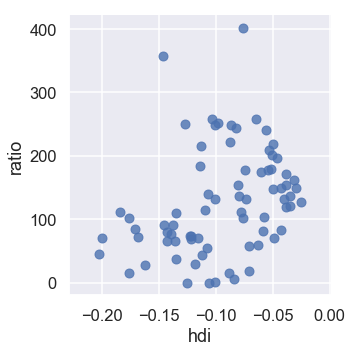

In [27]:
%matplotlib inline
sns.lmplot(x='hdi', y='ratio', data=df2,fit_reg=False);

# Data Analysis & Results

## OLS Regression Model For GDP vs Suicide Rate per 100K aka Ratio

In [28]:
import patsy
import statsmodels.api as sm
outcome_1, predictors_1 = patsy.dmatrices('ratio ~ gdp', df1)
mod_1 = sm.OLS(outcome_1, predictors_1)
type(mod_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.173
Date:                Mon, 03 Jun 2019   Prob (F-statistic):             0.0799
Time:                        15:31:27   Log-Likelihood:                -361.65
No. Observations:                  62   AIC:                             727.3
Df Residuals:                      60   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -90.4529    125.705     -0.720      0.4

## OLS Regression Model For HDI vs Suicide Rate per 100K aka Ratio

In [24]:
outcome_2, predictors_2 = patsy.dmatrices('ratio ~ hdi', df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
type(mod_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     7.801
Date:                Mon, 03 Jun 2019   Prob (F-statistic):            0.00666
Time:                        15:30:02   Log-Likelihood:                -433.64
No. Observations:                  75   AIC:                             871.3
Df Residuals:                      73   BIC:                             875.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.4883     21.460      8.457      0.0

# Privacy & Ethnic Considerations

# Conclusion & Discussion